In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# read dataset for project "all_data.csv"
data = pd.read_csv("all_data.csv")

In [5]:
# few first 5 rows
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [7]:
# identifies the number of rows and columns in our dataset as (rows, columns)
data.shape

(96, 4)

In [8]:
# the .drop_duplicates() function removes duplicate rows
data = data.drop_duplicates()
data.shape

(96, 4)

In [9]:
# views the data types
data.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

In [10]:
# counts the number of unique values in each column
data.nunique()

Country                              6
Year                                16
Life expectancy at birth (years)    69
GDP                                 96
dtype: int64

There are 6 different countries, Data most likely shows GDP from 2000 to 2015 for each country and the Life Expentancy every year

In [12]:
# counts the number of missing values in each column
data.isna().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

In [15]:
# which countries are we analyzing
print(data["Country"].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


These are the 6 countries in the dataset
Chile, China, Germany, Mexico, United States of America and Zimbabwe

In [24]:
# which year are we analyzing
print(data["Year"].unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


# Summary statistics of Life expectancy at birth (years) based on country

In [66]:
# Mean of Life expectancy at birth (years) based on country
data.groupby('Country')['Life expectancy at birth (years)'].mean().sort_values(ascending=False)

Country
Germany                     79.65625
Chile                       78.94375
United States of America    78.06250
Mexico                      75.71875
China                       74.26250
Zimbabwe                    50.09375
Name: Life expectancy at birth (years), dtype: float64

In [67]:
# Median of Life expectancy at birth (years) based on country
data.groupby('Country')['Life expectancy at birth (years)'].median().sort_values(ascending=False)

Country
Germany                     79.85
Chile                       79.00
United States of America    78.15
Mexico                      75.65
China                       74.45
Zimbabwe                    47.40
Name: Life expectancy at birth (years), dtype: float64

In [68]:
# Standard Deviation of Life expectancy at birth (years) based on country
data.groupby('Country')['Life expectancy at birth (years)'].std().sort_values(ascending=False)

Country
Zimbabwe                    5.940311
China                       1.318016
Chile                       1.058911
Germany                     0.975000
United States of America    0.832566
Mexico                      0.620987
Name: Life expectancy at birth (years), dtype: float64

# Summary statistics of GDP based on country

In [23]:
# Mean GDP based on country
data.groupby('Country')['GDP'].mean().sort_values(ascending=False)

Country
United States of America    1.407500e+13
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
Chile                       1.697888e+11
Zimbabwe                    9.062580e+09
Name: GDP, dtype: float64

In [70]:
# Median GDP based on country
data.groupby('Country')['GDP'].median().sort_values(ascending=False)

Country
United States of America    1.445000e+13
China                       4.075195e+12
Germany                     3.396350e+12
Mexico                      1.004376e+12
Chile                       1.729975e+11
Zimbabwe                    6.733671e+09
Name: GDP, dtype: float64

In [69]:
# Standard Deviation GDP based on country
data.groupby('Country')['GDP'].std().sort_values(ascending=False)

Country
China                       3.501096e+12
United States of America    2.432694e+12
Germany                     6.674862e+11
Mexico                      2.095716e+11
Chile                       7.687884e+10
Zimbabwe                    4.298310e+09
Name: GDP, dtype: float64

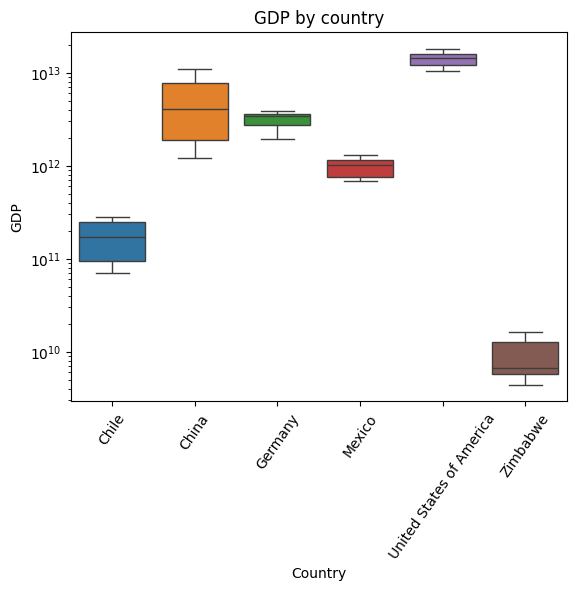

<Figure size 640x480 with 0 Axes>

In [43]:
# Create a boxplot for 'GDP' by country
sns.boxplot(data = data, x= 'Country', y='GDP',hue = "Country")
plt.xticks(rotation=55)
plt.yscale('log')
plt.title("GDP by country")
plt.show()
plt.clf()

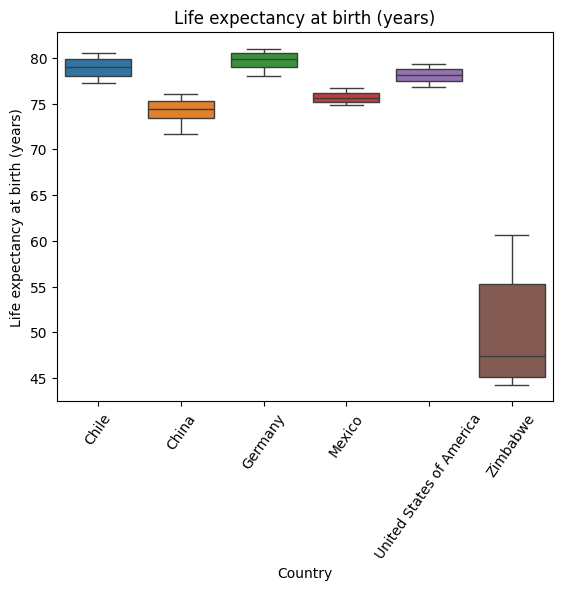

<Figure size 640x480 with 0 Axes>

In [48]:
# Create a boxplot for 'Life expectancy at birth (years)' by country
sns.boxplot(data = data, x= 'Country', y='Life expectancy at birth (years)',hue = "Country")
plt.xticks(rotation=55)
plt.title("Life expectancy at birth (years)")
plt.show()
plt.clf()

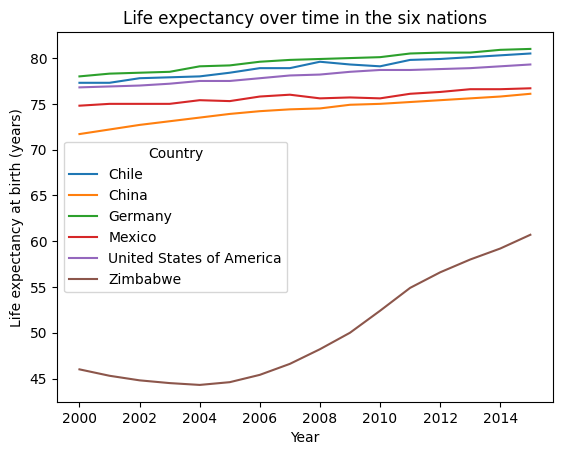

<Figure size 640x480 with 0 Axes>

In [57]:
# Life expectancy over time in the six nations
sns.lineplot(x='Year', y='Life expectancy at birth (years)', hue='Country', data=data)
plt.title('Life expectancy over time in the six nations')
plt.show()
plt.clf()

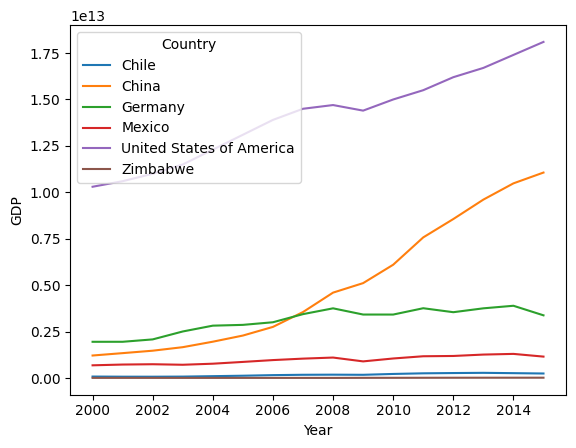

<Figure size 640x480 with 0 Axes>

In [51]:
# GDP over time in the six nations
sns.lineplot(x='Year', y='GDP', hue='Country', data=data)
plt.title('GDP over time in the six nations')
plt.show()
plt.clf()

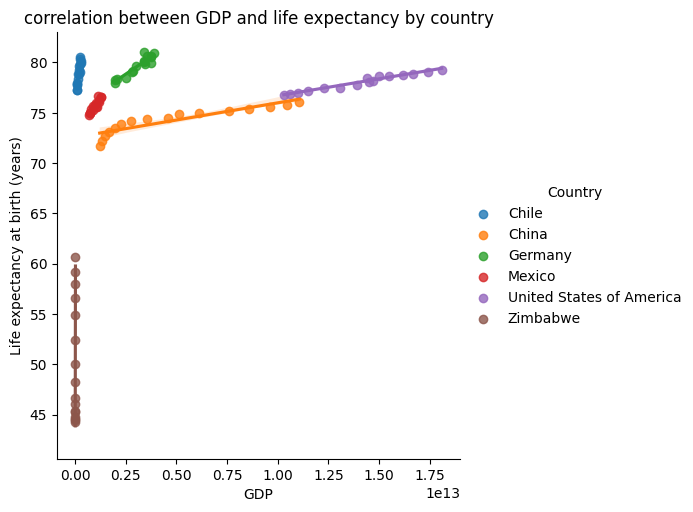

<Figure size 640x480 with 0 Axes>

In [59]:
# Is there a correlation between GDP and life expectancy of a country?
sns.lmplot(y='Life expectancy at birth (years)', x='GDP', hue='Country', data=data)
plt.title("correlation between GDP and life expectancy by country")
plt.show()
plt.clf()

Text(0.5, 1.0, 'Distribution of that life expectancy')

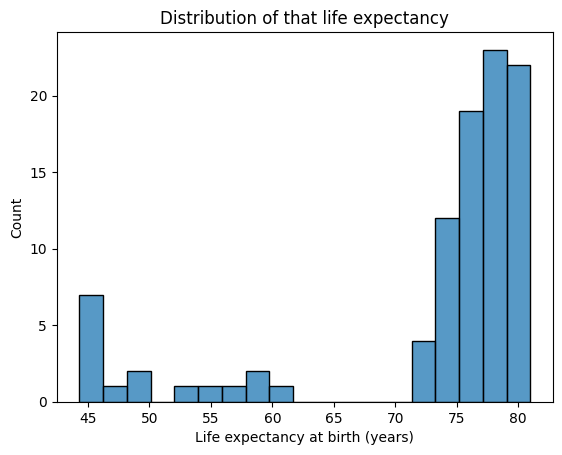

In [56]:
# histogram to show the distribution of that life expectancy
sns.histplot(data['Life expectancy at birth (years)'])
plt.title('Distribution of that life expectancy')

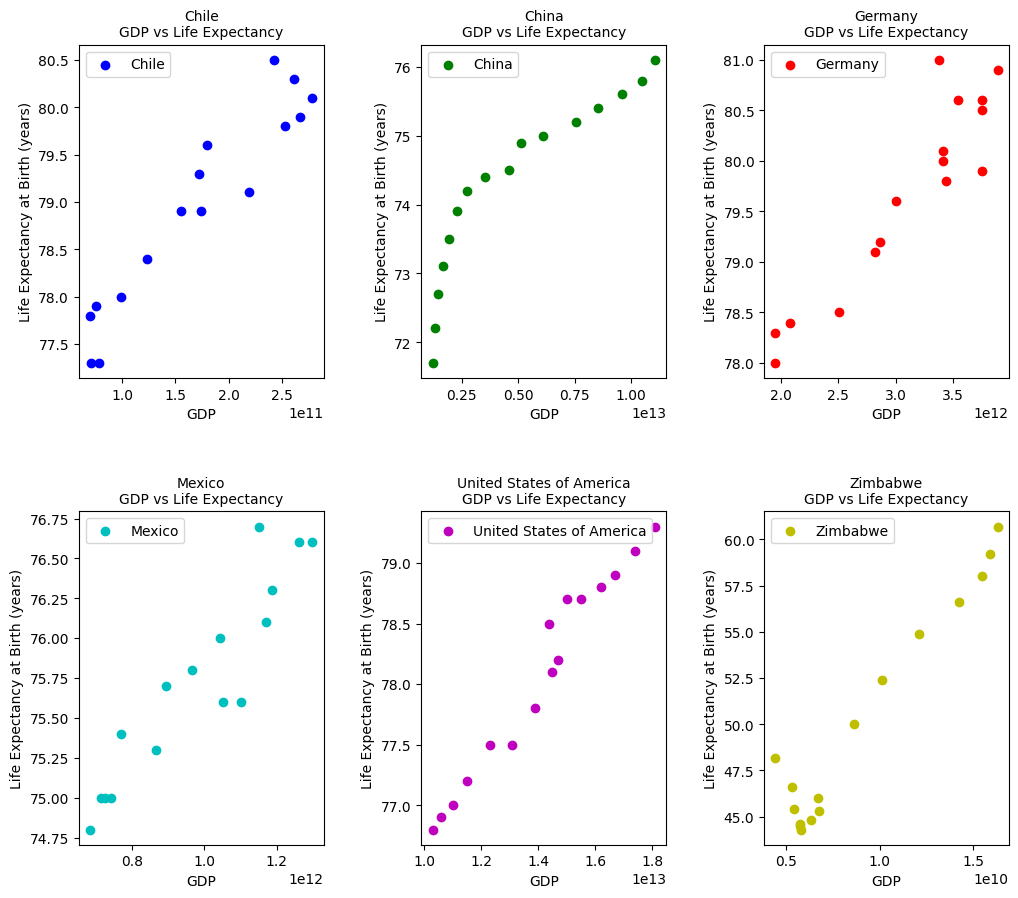

<Figure size 640x480 with 0 Axes>

In [22]:
# Unique list of countries
countries = data['Country'].unique()

# list of colors for different countries
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
# Check if we have enough colors, otherwise cycle through the list
if len(countries) > len(colors):
    colors = colors * (len(countries) // len(colors) + 1)

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a scatter plot for each country in a subplot
for i, country in enumerate(countries):
    plt.subplot(2, 3, i+1)  # Define the subplot grid and position

    # Filter data for the current country
    country_data = data[data['Country'] == country]

    plt.scatter(country_data['GDP'], country_data['Life expectancy at birth (years)'],
                label=country, color=colors[i])

    plt.title(f'{country}\nGDP vs Life Expectancy', fontsize=10)
    plt.xlabel('GDP')
    plt.ylabel('Life Expectancy at Birth (years)')
    plt.legend()

# Adjusts layout to prevent overlap
plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.4, wspace=0.4)

plt.show()
plt.clf()

Linear Regresion predicting Life expectancy based on GDP

In [36]:
import statsmodels.api as sm
data.rename(columns={'Life expectancy at birth (years)': 'life_e'}, inplace=True)

# Define the model
model = sm.OLS.from_formula('life_e ~ GDP', data=data)

# Fit the model
results = model.fit()

# View the summary of the regression results
summary = results.summary()
print(summary)



                            OLS Regression Results                            
Dep. Variable:                 life_e   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     12.55
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           0.000619
Time:                        08:31:06   Log-Likelihood:                -357.00
No. Observations:                  96   AIC:                             718.0
Df Residuals:                      94   BIC:                             723.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.0548      1.286     54.474      0.0

0    70.109657
1    70.104808
2    70.103931
3    70.108094
4    70.124703
dtype: float64
0    7.190343
1    7.195192
2    7.696069
3    7.791906
4    7.875297
dtype: float64


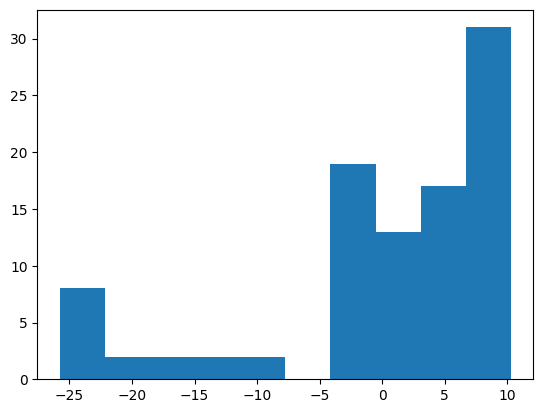

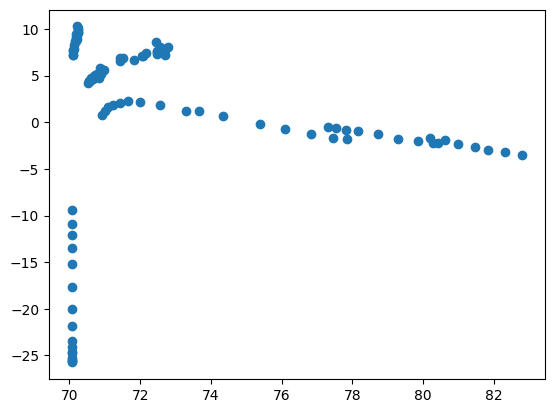

<Figure size 640x480 with 0 Axes>

In [38]:
fitted_values = results.predict(data)
print(fitted_values.head())

residuals = data.life_e - fitted_values
print(residuals.head())

plt.hist(residuals)
plt.show()
plt.clf()

# Check Homoscedasticity
plt.scatter(fitted_values,residuals)
plt.show()
plt.clf()